<a href="https://colab.research.google.com/github/rushilg13/Classification-of-Covid-Normal-and-seasnal-Flu-using-resnet-model/blob/master/ses02_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Fastai on covid-19 dataset</h2> 


### Step 1: Installing latest version of torch


In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #restart runtime after its done executing only if asked for.

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 41.8MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:

      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


## In case the system asks you to Restart Runtime, just execute.

### Step 2: Set up google colab for fast.ai

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


### Step 3: Import required libraries for image classification problem


In [3]:
from fastai.vision import *

### Step 4: Mounting Google drive

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Step 5: Setting path

In [6]:
%cd /content/gdrive/My\ Drive
path=Path('Covid-19/train') #set your path based on where you store.

/content/gdrive/My Drive


In [7]:
!ls {path} #printing list of files/folder in the path

Covid  export.pkl  models  Normal  Seasonal_flu


### Step 6: Image Preprocessing 


Verifying for corrupt Images in the dataset 

In [8]:
classes = ['Covid','Normal','Seasonal_flu'] ##Classification problem 

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500 )

Covid


Normal


Seasonal_flu


Dataset needs to be converted into a DataBunch object, and in the case of the computer vision data - specifically into an ImageDataBunch subclass. Parameter 1 is the path of the folder, train='.', . means the files that are present the forder are all train data with validation data of 20 percent. 

Here is the link for get_transform
https://docs.fast.ai/vision.transform.html#get_transforms

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats) #Go to PPT

##It is always a good practice to check whether the data is read correctly or not.

In [11]:
data.classes

['Covid', 'Normal', 'Seasonal_flu']

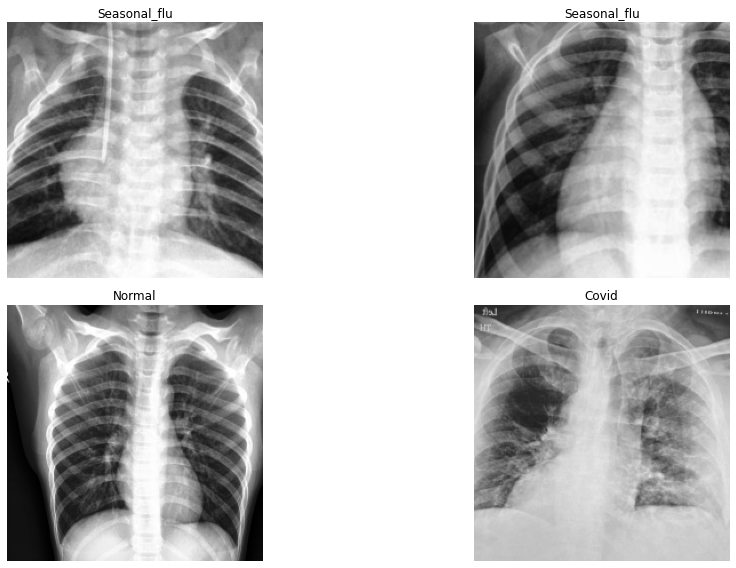

In [12]:
data.show_batch(rows=2, figsize=(16,8))

### Step 7. Train model.  

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate) #CNN:  Convolution neural net

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


##Go to PPT

In [14]:
learn.fit_one_cycle(10) 

epoch,train_loss,valid_loss,error_rate,time
0,1.637050,1.175697,0.439394,00:08
1,1.094111,0.443384,0.106061,00:06
2,0.787455,1.699699,0.242424,00:06
3,0.622475,1.077269,0.166667,00:06
4,0.524854,1.163302,0.166667,00:06
5,0.430904,0.941348,0.166667,00:06
6,0.376059,0.638271,0.151515,00:06
7,0.328187,0.460757,0.121212,00:06
8,0.301143,0.340705,0.121212,00:06
9,0.276395,0.239824,0.075758,00:06


In [ ]:
learn.save('stage-1')

In [15]:
learn.unfreeze() #Train weights at all the layers of the network

In [16]:
learn.lr_find() #We can either manually supply start and end learning rate or it will take values between 1e-07 to 1e01 by default

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


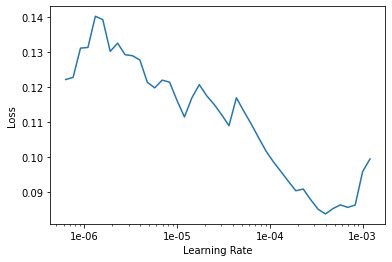

In [17]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e3)) #The idea of decreasing the learning rate as you train is called learning rate annealing

epoch,train_loss,valid_loss,error_rate,time
0,384685.125000,9642914984234436691755008.000000,0.742424,00:07
1,836681600.000000,57145564335076405963390976.000000,0.742424,00:07
2,3178853740576768.000000,nan,0.636364,00:07
3,96424752167380232175616.000000,nan,0.636364,00:07
4,nan,nan,0.636364,00:07
5,nan,nan,0.636364,00:07
6,nan,nan,0.636364,00:07
7,nan,nan,0.636364,00:07
8,nan,nan,0.636364,00:06
9,nan,nan,0.636364,00:07


In [ ]:
learn.save('stage-2')

### Step 8. Interpret the result

In [ ]:
learn.load('stage-2');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

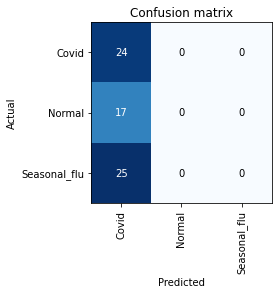

In [20]:
interp.plot_confusion_matrix() #Confusion matrix is where actual results are in rows and predicted are in columns

In [ ]:
from fastai.widgets import ClassConfusion

In [ ]:
ClassConfusion(interp,classes)

Please enter a value for `k`, or the top images you will see: 1


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


<Figure size 432x288 with 0 Axes>

### Step 9. Predict a new image for the class it belongs to

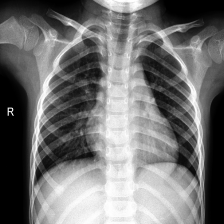

In [ ]:
path=Path('RWDS/ses02/Covid-19/test')
img = open_image(path/'test1.jpeg')
img.resize(torch.Size([img.shape[0],224,224]))

In [ ]:
learn.export()
path=Path('RWDS/ses02/Covid-19/train')

learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Normal'